In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
from keras.utils import np_utils
from keras.models import Sequential
from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

c:\Users\Sineth Sankalpa\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
X_train = np.load("../numpy/X_train.npy")
X_test = np.load("../numpy/X_test.npy")
y_train = np.load("../numpy/y_train.npy")
y_test = np.load("../numpy/y_test.npy")

In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

In [5]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [6]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(21667, 48, 48, 1) (7223, 48, 48, 1)
(21667, 8) (7223, 8)


In [7]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block1_conv1', input_shape=(48, 48, 1) ))
model.add(Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block1_conv2'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block1_maxpool'))

model.add(Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block2_conv1'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block2_conv2'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block2_maxpool'))

model.add(Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block3_conv1'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block3_conv2'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block3_conv3'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block3_maxpool'))

model.add(Conv2D(512, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block4_conv1'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block4_conv2'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block4_conv3'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block4_maxpool'))

model.add(Conv2D(512, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block5_conv1'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block5_conv2'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-7), kernel_initializer='he_uniform', name='block5_conv3'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block5_maxpool'))

model.add(Flatten())
model.add(Dense(4096, kernel_regularizer=l2(1e-7), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4096, kernel_regularizer=l2(1e-7), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0002), loss='categorical_crossentropy', metrics=['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        640       
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_maxpool (MaxPooling2  (None, 24, 24, 64)       0         
 D)                                                              
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_maxpool (MaxPooling2  (None, 12, 12, 128)      0         
 D)                                                     

In [8]:
datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.1,
    shear_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [9]:
best_loss_checkpoint = ModelCheckpoint(
    filepath=f'../models/ground_VGG16-best_loss_model.h5',
    monitor='loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)

best_val_loss_checkpoint = ModelCheckpoint(
    filepath=f'../models/ground_VGG16-best_val_loss_model.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)

In [10]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64, shuffle=True),
    validation_data=(X_test, y_test),
    validation_steps=X_test.shape[0] // 64,
    epochs=20,  
    verbose=1,
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 1/20
339/339 [==============================] - 1920s 6s/step - loss: 2.0010 - accuracy: 0.2489 - val_loss: 1.9001 - val_accuracy: 0.3057
Epoch 2/20
339/339 [==============================] - 1820s 5s/step - loss: 1.7971 - accuracy: 0.3431 - val_loss: 1.6498 - val_accuracy: 0.3951
Epoch 3/20
339/339 [==============================] - 1783s 5s/step - loss: 1.6264 - accuracy: 0.4005 - val_loss: 1.5272 - val_accuracy: 0.4159
Epoch 4/20
339/339 [==============================] - 1780s 5s/step - loss: 1.4822 - accuracy: 0.4553 - val_loss: 1.3776 - val_accuracy: 0.4774
Epoch 5/20
339/339 [==============================] - 1785s 5s/step - loss: 1.3720 - accuracy: 0.4905 - val_loss: 1.3047 - val_accuracy: 0.5150
Epoch 6/20
339/339 [==============================] - 1782s 5s/step - loss: 1.3049 - accuracy: 0.5141 - val_loss: 1.2863 - val_accuracy: 0.5095
Epoch 7/20
339/339 [==============================] - 1781s 5s/step - loss: 1.2408 - accuracy: 0.5329 - val_loss: 1.1728 - val_accuracy:

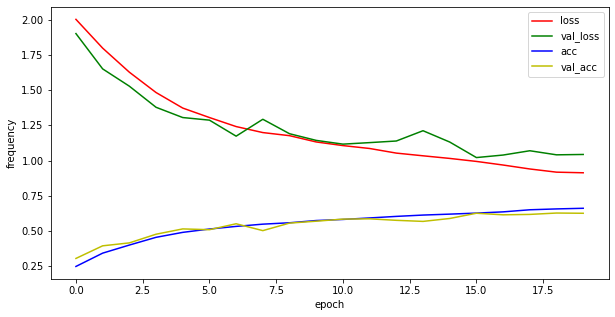

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], 'r-', label='loss')
plt.plot(history.history['val_loss'], 'g-', label='val_loss')
plt.plot(history.history['accuracy'], 'b-', label='acc')
plt.plot(history.history['val_accuracy'], 'y-', label='val_acc')
plt.xlabel('epoch')
plt.ylabel('frequency')
plt.legend()
plt.show()

In [11]:
model.load_weights("../models/ground_VGG16-best_loss_model.h5")

In [12]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64, shuffle=True),
    validation_data=(X_test, y_test),
    epochs=40,  
    verbose=1,
    initial_epoch=20,
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 21/40
339/339 [==============================] - 2771s 8s/step - loss: 0.8877 - accuracy: 0.6715 - val_loss: 0.9765 - val_accuracy: 0.6399
Epoch 22/40
339/339 [==============================] - 2176s 6s/step - loss: 0.8634 - accuracy: 0.6793 - val_loss: 1.0006 - val_accuracy: 0.6421
Epoch 23/40
339/339 [==============================] - 1919s 6s/step - loss: 0.8491 - accuracy: 0.6862 - val_loss: 0.9805 - val_accuracy: 0.6471
Epoch 24/40
339/339 [==============================] - 1913s 6s/step - loss: 0.8503 - accuracy: 0.6882 - val_loss: 1.0009 - val_accuracy: 0.6439
Epoch 25/40
339/339 [==============================] - 1913s 6s/step - loss: 0.8215 - accuracy: 0.6954 - val_loss: 1.0166 - val_accuracy: 0.6438
Epoch 26/40
339/339 [==============================] - 1817s 5s/step - loss: 0.7979 - accuracy: 0.7053 - val_loss: 0.9409 - val_accuracy: 0.6607
Epoch 27/40
339/339 [==============================] - 1807s 5s/step - loss: 0.7914 - accuracy: 0.7078 - val_loss: 0.9604 - val_ac

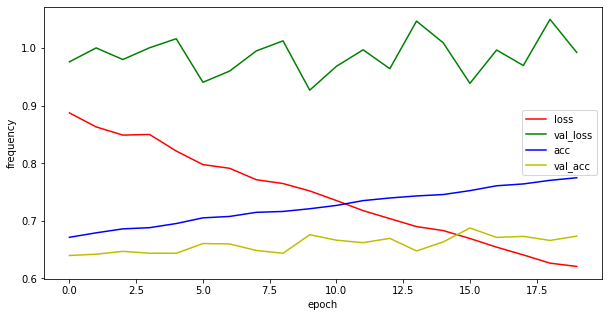

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], 'r-', label='loss')
plt.plot(history.history['val_loss'], 'g-', label='val_loss')
plt.plot(history.history['accuracy'], 'b-', label='acc')
plt.plot(history.history['val_accuracy'], 'y-', label='val_acc')
plt.xlabel('epoch')
plt.ylabel('frequency')
plt.legend()
plt.show()

In [14]:
model.load_weights("../models/ground_VGG16-best_loss_model.h5")

In [15]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64, shuffle=True),
    validation_data=(X_test, y_test),
    epochs=60,  
    verbose=1,
    initial_epoch=40,
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 41/60
339/339 [==============================] - 2045s 6s/step - loss: 0.6076 - accuracy: 0.7792 - val_loss: 1.0384 - val_accuracy: 0.6716
Epoch 42/60
339/339 [==============================] - 1962s 6s/step - loss: 0.5928 - accuracy: 0.7797 - val_loss: 0.9899 - val_accuracy: 0.6737
Epoch 43/60
339/339 [==============================] - 1811s 5s/step - loss: 0.5857 - accuracy: 0.7833 - val_loss: 1.0284 - val_accuracy: 0.6740
Epoch 44/60
339/339 [==============================] - 1814s 5s/step - loss: 0.5757 - accuracy: 0.7918 - val_loss: 1.0272 - val_accuracy: 0.6683
Epoch 45/60
339/339 [==============================] - 1820s 5s/step - loss: 0.5689 - accuracy: 0.7912 - val_loss: 0.9937 - val_accuracy: 0.6729
Epoch 46/60
339/339 [==============================] - 1805s 5s/step - loss: 0.5519 - accuracy: 0.7973 - val_loss: 0.9965 - val_accuracy: 0.6783
Epoch 47/60
339/339 [==============================] - 1805s 5s/step - loss: 0.5392 - accuracy: 0.8016 - val_loss: 0.9981 - val_ac

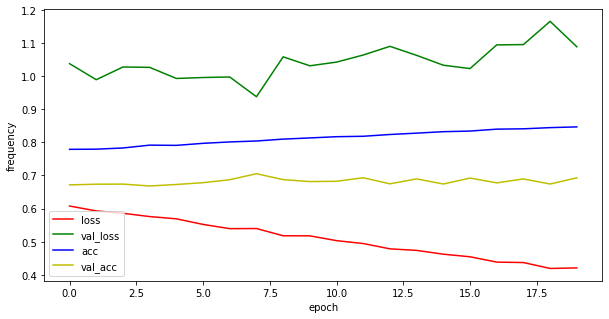

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], 'r-', label='loss')
plt.plot(history.history['val_loss'], 'g-', label='val_loss')
plt.plot(history.history['accuracy'], 'b-', label='acc')
plt.plot(history.history['val_accuracy'], 'y-', label='val_acc')
plt.xlabel('epoch')
plt.ylabel('frequency')
plt.legend()
plt.show()

In [17]:
model.load_weights("../models/ground_VGG16-best_loss_model.h5")

In [18]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64, shuffle=True),
    validation_data=(X_test, y_test),
    epochs=80,  
    verbose=1,
    initial_epoch=60,
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 61/80
339/339 [==============================] - 1779s 5s/step - loss: 0.4082 - accuracy: 0.8513 - val_loss: 1.1352 - val_accuracy: 0.6892
Epoch 62/80
339/339 [==============================] - 1782s 5s/step - loss: 0.4141 - accuracy: 0.8498 - val_loss: 1.0760 - val_accuracy: 0.6947
Epoch 63/80
339/339 [==============================] - 1772s 5s/step - loss: 0.3902 - accuracy: 0.8581 - val_loss: 1.1242 - val_accuracy: 0.6875
Epoch 64/80
339/339 [==============================] - 1777s 5s/step - loss: 0.3884 - accuracy: 0.8586 - val_loss: 1.0572 - val_accuracy: 0.6933
Epoch 65/80
339/339 [==============================] - 1782s 5s/step - loss: 0.3848 - accuracy: 0.8590 - val_loss: 1.1762 - val_accuracy: 0.6814
Epoch 66/80
339/339 [==============================] - 1771s 5s/step - loss: 0.3655 - accuracy: 0.8697 - val_loss: 1.1906 - val_accuracy: 0.6920
Epoch 67/80
339/339 [==============================] - 1774s 5s/step - loss: 0.3678 - accuracy: 0.8694 - val_loss: 1.1664 - val_ac

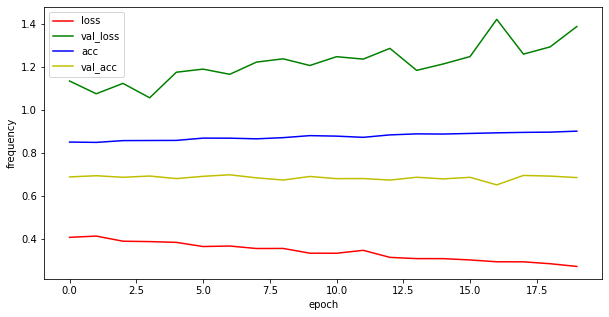

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], 'r-', label='loss')
plt.plot(history.history['val_loss'], 'g-', label='val_loss')
plt.plot(history.history['accuracy'], 'b-', label='acc')
plt.plot(history.history['val_accuracy'], 'y-', label='val_acc')
plt.xlabel('epoch')
plt.ylabel('frequency')
plt.legend()
plt.show()

In [20]:
model.load_weights("../models/ground_VGG16-best_loss_model.h5")

In [21]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64, shuffle=True),
    validation_data=(X_test, y_test),
    epochs=80,  
    verbose=1,
    initial_epoch=60,
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 61/80
339/339 [==============================] - 1705s 5s/step - loss: 0.2775 - accuracy: 0.9014 - val_loss: 1.2685 - val_accuracy: 0.6913
Epoch 62/80
339/339 [==============================] - 1703s 5s/step - loss: 0.2646 - accuracy: 0.9044 - val_loss: 1.2340 - val_accuracy: 0.6979
Epoch 63/80
339/339 [==============================] - 1708s 5s/step - loss: 0.2653 - accuracy: 0.9057 - val_loss: 1.2810 - val_accuracy: 0.6940
Epoch 64/80
339/339 [==============================] - 1707s 5s/step - loss: 0.2573 - accuracy: 0.9088 - val_loss: 1.2664 - val_accuracy: 0.6918
Epoch 65/80
339/339 [==============================] - 1714s 5s/step - loss: 0.2550 - accuracy: 0.9094 - val_loss: 1.4100 - val_accuracy: 0.6771
Epoch 66/80
339/339 [==============================] - 1720s 5s/step - loss: 0.2532 - accuracy: 0.9109 - val_loss: 1.3299 - val_accuracy: 0.6989
Epoch 67/80
339/339 [==============================] - 1708s 5s/step - loss: 0.2490 - accuracy: 0.9123 - val_loss: 1.2738 - val_ac

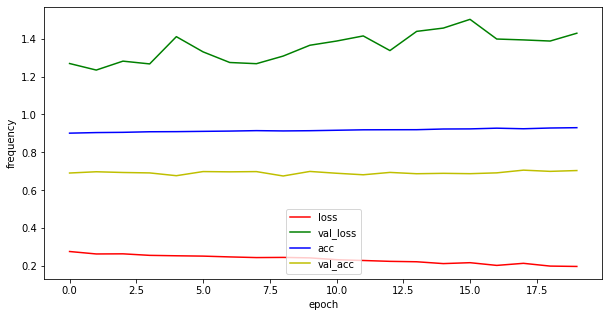

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], 'r-', label='loss')
plt.plot(history.history['val_loss'], 'g-', label='val_loss')
plt.plot(history.history['accuracy'], 'b-', label='acc')
plt.plot(history.history['val_accuracy'], 'y-', label='val_acc')
plt.xlabel('epoch')
plt.ylabel('frequency')
plt.legend()
plt.show()

In [10]:
model.load_weights("../models/ground_VGG16-best_loss_model.h5")

In [11]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64, shuffle=True),
    validation_data=(X_test, y_test),
    epochs=100,  
    verbose=1,
    initial_epoch=80,
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 81/100
339/339 [==============================] - 1879s 6s/step - loss: 0.2118 - accuracy: 0.9262 - val_loss: 1.5748 - val_accuracy: 0.6755
Epoch 82/100
339/339 [==============================] - 1865s 6s/step - loss: 0.2021 - accuracy: 0.9278 - val_loss: 1.6859 - val_accuracy: 0.6699
Epoch 83/100
339/339 [==============================] - 1872s 6s/step - loss: 0.1998 - accuracy: 0.9304 - val_loss: 1.3896 - val_accuracy: 0.6958
Epoch 84/100
339/339 [==============================] - 1845s 5s/step - loss: 0.2052 - accuracy: 0.9284 - val_loss: 1.5601 - val_accuracy: 0.6914
Epoch 85/100
339/339 [==============================] - 1818s 5s/step - loss: 0.1995 - accuracy: 0.9309 - val_loss: 1.4311 - val_accuracy: 0.6915
Epoch 86/100
339/339 [==============================] - 1811s 5s/step - loss: 0.1856 - accuracy: 0.9348 - val_loss: 1.4957 - val_accuracy: 0.6954
Epoch 87/100
339/339 [==============================] - 1778s 5s/step - loss: 0.1883 - accuracy: 0.9328 - val_loss: 1.5916 -

KeyboardInterrupt: 

In [10]:
model.load_weights("../models/ground_VGG16-best_loss_model.h5")

In [11]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64, shuffle=True),
    validation_data=(X_test, y_test),
    epochs=100,  
    verbose=1,
    initial_epoch=90,
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 91/100
339/339 [==============================] - 1717s 5s/step - loss: 0.1759 - accuracy: 0.9397 - val_loss: 1.5313 - val_accuracy: 0.6864
Epoch 92/100
339/339 [==============================] - 1838s 5s/step - loss: 0.1802 - accuracy: 0.9397 - val_loss: 1.4565 - val_accuracy: 0.7005
Epoch 93/100
339/339 [==============================] - 1756s 5s/step - loss: 0.1734 - accuracy: 0.9402 - val_loss: 1.6380 - val_accuracy: 0.6922
Epoch 94/100
339/339 [==============================] - 1734s 5s/step - loss: 0.1867 - accuracy: 0.9359 - val_loss: 1.4901 - val_accuracy: 0.6939
Epoch 95/100
339/339 [==============================] - 1730s 5s/step - loss: 0.1651 - accuracy: 0.9434 - val_loss: 1.6119 - val_accuracy: 0.6957
Epoch 96/100
339/339 [==============================] - 1724s 5s/step - loss: 0.1741 - accuracy: 0.9396 - val_loss: 1.2902 - val_accuracy: 0.6960
Epoch 97/100
339/339 [==============================] - 1729s 5s/step - loss: 0.1765 - accuracy: 0.9390 - val_loss: 1.5300 -

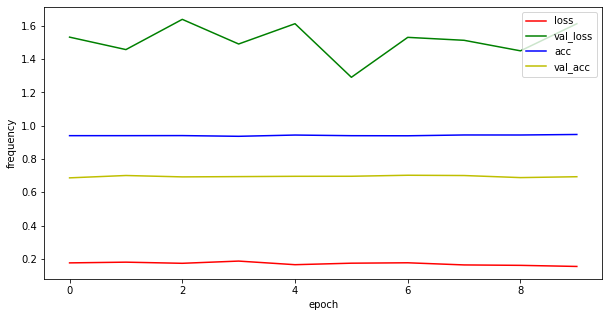

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], 'r-', label='loss')
plt.plot(history.history['val_loss'], 'g-', label='val_loss')
plt.plot(history.history['accuracy'], 'b-', label='acc')
plt.plot(history.history['val_accuracy'], 'y-', label='val_acc')
plt.xlabel('epoch')
plt.ylabel('frequency')
plt.legend()
plt.show()